## **AQUECIMENTO ZONA 3 - IMPREGNADORA**

Nos últimos dias onde tivemos evento de prensa continua parada ocorrem falhas de aquecimento na zona 3 da Impregnadora de Papel da unidade de Taquari. 

Ao verificar o local os profissionais de manutenção identificaram que a válvula estava 100% aberta tanto física quanto logicamente, porem a temperatura setada pelos operadores não era atingida. 

Por conta disso em conjunto com o sr Alex Cruz e André Casanova, iniciamos um trabalho de análise das variáveis que são historiadas pelo Pi Vision. 


In [1]:
from logging import warning
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

import plotly.express as px

pd.options.display.max_rows = 300
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## **1.SOBRE A BASE DE DADOS**

Todos os dados foram exportados diretamente do PI vision através de conexão que tenho com o Excel

A base de dados utilizada neste estudo foi coletada com o auxilio do Bruno Lopes que nos ensinou como fazer o export dos dados de forma mais eficiente do que a forma como estávamos trabalhando. 


Como o evento ocorreu no mês de Setembro, pegamos dados iniciando no dia 01/09 até o dia 22/09. 

>OBS: O evento ocorreu na madrugado do dia `20` para o dia `21`


### **1.1.SOBRE AS VARIÁVEIS**

Como o objetivo inicial do estudo consistia na identificação de quais variáveis poderiam estar contribuindo para a ineficiência na zona de aquecimento 3, coletamos dados de dos os itens de nosso sistema de aquecimento de óleo térmico.

Foram coletados dados das bombas de aquecimento da prensa continua, bombas de circulação da planta de Energia, ventiladores da Planta, vazão de óleo assim como todas as temperaturas e seus set points de todas as zonas de aquecimento da impregnadora. 

O resultado foi uma tabela inicial com 72 variáveis e mais de 1000 linhas de dados coletados de 30 em 30 minutos. 


In [3]:
df = pd.read_excel('oleo_termico_impreg1.xlsx')
df.head(1)

,Data,Prensa,MDP Aq 01 Posi Val,MDP Aq 01 Temp Entrada,MDP Aq 01 Temp Retorno,MDP Aq 01 Temp Nominal,MDP Aq 01 Temp Prato,MDP Aq 02 Posi Val,MDP Aq 02 Temp Entrada,MDP Aq 02 Temp Retorno,MDP Aq 02 Temp Nominal,MDP Aq 02 Temp Prato,MDP Aq 03 Posi Val,MDP Aq 03 Temp Entrada,MDP Aq 03 Temp Retorno,MDP Aq 03 Temp Nominal,MDP Aq 03 Temp Prato,MDP Aq 04 Posi Val,MDP Aq 04 Temp Entrada,MDP Aq 04 Temp Retorno,MDP Aq 04 Temp Nominal,MDP Aq 04 Temp Prato,MDP Aq 05 Posi Val,MDP Aq 05 Temp Entrada,MDP Aq 05 Temp Retorno,MDP Aq 05 Temp Nominal,MDP Aq 05 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Rotacao,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 1 Velocidade,Planta Bomba Secudaria 2 Corrente,Planta Bomba Secudaria 2 Rotacao,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 2 Velocidade,Planta Bomba Secudaria 3 Corrente,Planta Bomba Secudaria 3 Rotacao,Planta Bomba Secudaria 3 Status,Planta Bomba Secudaria 3 Velocidade,Planta Vazao Oleo Revestido,Impregnadora Vazao Oleo Termico,Impregnadora Temperatura Entrada Oleo,Impregnadora Temperatura de Saida Oleo,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Set Point Velocidade Real,Impregnadora Vent zona 1 Status,Impregnadora Vent zona 2 Set Point Velocidade,Impregnadora Vent zona 2 Set Point Velocidade Real,Impregnadora Vent zona 2 Status,Impregnadora Vent zona 3 Set Point Velocidade,Impregnadora Vent zona 3 Set Point Velocidade Real,Impregnadora Vent zona 3 Status,Impregnadora Vent zona 4 Set Point Velocidade,Impregnadora Vent zona 4 Set Point Velocidade Real,Impregnadora Vent zona 4 Status,Impregnadora Vent zona 5 Set Point Velocidade,Impregnadora Vent zona 5 Set Point Velocidade Real,Impregnadora Vent zona 5 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Temperatura Real,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 2 Set Point Temperatura,Impregnadora Aq Zona 2 Temperatura Real,Impregnadora Aq Zona 2 Posicao Valvula,Impregnadora Aq Zona 3 Set Point Temperatura,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Set Point Temperatura,Impregnadora Aq Zona 4 Temperatura Real,Impregnadora Aq Zona 4 Posicao Valvula,Impregnadora Aq Zona 5 Set Point Temperatura,Impregnadora Aq Zona 5 Temperatura Real,Impregnadora Aq Zona 5 Posicao Valvula
0,2022-09-01,Fechado,24.010864,247.517517,245.055817,245,4.612755,67.817307,254.783447,249.787796,238,236.867538,68.449203,243.924393,248.399994,238,238.068222,5.418137,200.300003,199.164856,195,195.130768,4.612755,190.699997,190.521912,185,188.5,60,1416.354004,Ligado,80,48.099998,1415.645996,Ligado,80,0,0,Desligado,0,No Data,55.052082,247.531143,251.470871,1696.800049,1688,1,1688,1688,1,1709.599976,1688,1,1709.599976,1700.700073,1,1705.599976,1696,1,110,113.27021,0,110,110.164993,0.073838,163,162.622452,34.117477,158,159.344452,0,153,153.116928,0


In [4]:
df.tail(1)

,Data,Prensa,MDP Aq 01 Posi Val,MDP Aq 01 Temp Entrada,MDP Aq 01 Temp Retorno,MDP Aq 01 Temp Nominal,MDP Aq 01 Temp Prato,MDP Aq 02 Posi Val,MDP Aq 02 Temp Entrada,MDP Aq 02 Temp Retorno,MDP Aq 02 Temp Nominal,MDP Aq 02 Temp Prato,MDP Aq 03 Posi Val,MDP Aq 03 Temp Entrada,MDP Aq 03 Temp Retorno,MDP Aq 03 Temp Nominal,MDP Aq 03 Temp Prato,MDP Aq 04 Posi Val,MDP Aq 04 Temp Entrada,MDP Aq 04 Temp Retorno,MDP Aq 04 Temp Nominal,MDP Aq 04 Temp Prato,MDP Aq 05 Posi Val,MDP Aq 05 Temp Entrada,MDP Aq 05 Temp Retorno,MDP Aq 05 Temp Nominal,MDP Aq 05 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Rotacao,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 1 Velocidade,Planta Bomba Secudaria 2 Corrente,Planta Bomba Secudaria 2 Rotacao,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 2 Velocidade,Planta Bomba Secudaria 3 Corrente,Planta Bomba Secudaria 3 Rotacao,Planta Bomba Secudaria 3 Status,Planta Bomba Secudaria 3 Velocidade,Planta Vazao Oleo Revestido,Impregnadora Vazao Oleo Termico,Impregnadora Temperatura Entrada Oleo,Impregnadora Temperatura de Saida Oleo,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Set Point Velocidade Real,Impregnadora Vent zona 1 Status,Impregnadora Vent zona 2 Set Point Velocidade,Impregnadora Vent zona 2 Set Point Velocidade Real,Impregnadora Vent zona 2 Status,Impregnadora Vent zona 3 Set Point Velocidade,Impregnadora Vent zona 3 Set Point Velocidade Real,Impregnadora Vent zona 3 Status,Impregnadora Vent zona 4 Set Point Velocidade,Impregnadora Vent zona 4 Set Point Velocidade Real,Impregnadora Vent zona 4 Status,Impregnadora Vent zona 5 Set Point Velocidade,Impregnadora Vent zona 5 Set Point Velocidade Real,Impregnadora Vent zona 5 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Temperatura Real,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 2 Set Point Temperatura,Impregnadora Aq Zona 2 Temperatura Real,Impregnadora Aq Zona 2 Posicao Valvula,Impregnadora Aq Zona 3 Set Point Temperatura,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Set Point Temperatura,Impregnadora Aq Zona 4 Temperatura Real,Impregnadora Aq Zona 4 Posicao Valvula,Impregnadora Aq Zona 5 Set Point Temperatura,Impregnadora Aq Zona 5 Temperatura Real,Impregnadora Aq Zona 5 Posicao Valvula
1008,2022-09-22,Fechado,25.177307,247.972733,245.024063,245,5.31988,72.966103,253.821487,249.008926,238,236.714737,63.703209,240.399994,244.600006,235,235.029266,1.295647,193.699997,193.116882,190,190.527802,5.31988,187.992584,187.989944,185,186.390945,60.799999,1415.911499,Ligado,80,48.325001,1416.796509,Ligado,80,0,0,Desligado,0,No Data,61.319443,246.24379,240.499603,1703.599976,1693.599976,1,1693.599976,1693.599976,1,1709.269531,1693.599976,1,1709.269287,1700.369263,1,1707.200073,1697.900024,1,130,131.399994,0,130,129.944443,2.846389,169,169.117569,25.183136,165,164.440536,30.055216,160,160.008087,8.491204


In [5]:
df.shape

(1009, 73)

In [6]:
df.dtypes.head()

Data                      datetime64[ns]
Prensa                            object
MDP Aq 01 Posi Val                object
MDP Aq 01 Temp Entrada            object
MDP Aq 01 Temp Retorno            object
dtype: object

### **1.3.LIMPEZA DOS DADOS**

Apesar de recebermos os dados de forma bem estruturada quando os dados são exportados, temos alguns pequenos problemas que devem ser tratados, principalmente se vamos empregar modelos de Machine Learning para análise. 

Alguns problemas que podemos citar são: dados com informações faltantes, dados com informações categóricas (Ligado e Desligado) e dados com mensagens de erro do próprio banco de dados.




>Nas linhas abaixo o procedimento de limpeza é realizado

In [7]:
# Colunas que possuem Dados Categóricos
remove = ['Planta Bomba Secudaria 1 Status', 'Planta Bomba Secudaria 2 Status','Planta Bomba Secudaria 3 Status' , 
'Planta Vazao Oleo Revestido','Prensa' ]

In [8]:
# Criando cópia da Base de dados Original para aplicar o procedimento de limpeza dos dados
df2 = df.copy()

In [9]:
# Tratando dados Liga e Delisga - Criando Função
def binario(x):
    if x == 'Ligado':
        return 1
    elif x == 'Desligado':
        return 0
    elif x == 'Aberto':
        return 0
    elif x == 'Fechado':
        return 1
    else:
        return np.NaN
# Aplicando a função nos dados Categóricos da Base
for i in remove:
    df2[i] = df2[i].map(binario)

In [10]:
# Verificando o resultado do tratamento dos Dados
df2['Prensa'].value_counts()

1.0    511
0.0    497
Name: Prensa, dtype: int64

In [11]:
# Tratando Dados Intf Shut
def inshuf(x):
    if x == 'Intf Shut':
        return np.NaN
    else:
        return x

for i in df2.columns:
    df2[i] = df2[i].map(inshuf)

In [12]:
# Transformando os dados em Float
for i in df2.columns:
    if i != 'Data':
        df2[i] = df2[i].astype('float')
    else:
        continue

In [13]:
# Verificando o resultado na base
df2.head(1)

,Data,Prensa,MDP Aq 01 Posi Val,MDP Aq 01 Temp Entrada,MDP Aq 01 Temp Retorno,MDP Aq 01 Temp Nominal,MDP Aq 01 Temp Prato,MDP Aq 02 Posi Val,MDP Aq 02 Temp Entrada,MDP Aq 02 Temp Retorno,MDP Aq 02 Temp Nominal,MDP Aq 02 Temp Prato,MDP Aq 03 Posi Val,MDP Aq 03 Temp Entrada,MDP Aq 03 Temp Retorno,MDP Aq 03 Temp Nominal,MDP Aq 03 Temp Prato,MDP Aq 04 Posi Val,MDP Aq 04 Temp Entrada,MDP Aq 04 Temp Retorno,MDP Aq 04 Temp Nominal,MDP Aq 04 Temp Prato,MDP Aq 05 Posi Val,MDP Aq 05 Temp Entrada,MDP Aq 05 Temp Retorno,MDP Aq 05 Temp Nominal,MDP Aq 05 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Rotacao,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 1 Velocidade,Planta Bomba Secudaria 2 Corrente,Planta Bomba Secudaria 2 Rotacao,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 2 Velocidade,Planta Bomba Secudaria 3 Corrente,Planta Bomba Secudaria 3 Rotacao,Planta Bomba Secudaria 3 Status,Planta Bomba Secudaria 3 Velocidade,Planta Vazao Oleo Revestido,Impregnadora Vazao Oleo Termico,Impregnadora Temperatura Entrada Oleo,Impregnadora Temperatura de Saida Oleo,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Set Point Velocidade Real,Impregnadora Vent zona 1 Status,Impregnadora Vent zona 2 Set Point Velocidade,Impregnadora Vent zona 2 Set Point Velocidade Real,Impregnadora Vent zona 2 Status,Impregnadora Vent zona 3 Set Point Velocidade,Impregnadora Vent zona 3 Set Point Velocidade Real,Impregnadora Vent zona 3 Status,Impregnadora Vent zona 4 Set Point Velocidade,Impregnadora Vent zona 4 Set Point Velocidade Real,Impregnadora Vent zona 4 Status,Impregnadora Vent zona 5 Set Point Velocidade,Impregnadora Vent zona 5 Set Point Velocidade Real,Impregnadora Vent zona 5 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Temperatura Real,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 2 Set Point Temperatura,Impregnadora Aq Zona 2 Temperatura Real,Impregnadora Aq Zona 2 Posicao Valvula,Impregnadora Aq Zona 3 Set Point Temperatura,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Set Point Temperatura,Impregnadora Aq Zona 4 Temperatura Real,Impregnadora Aq Zona 4 Posicao Valvula,Impregnadora Aq Zona 5 Set Point Temperatura,Impregnadora Aq Zona 5 Temperatura Real,Impregnadora Aq Zona 5 Posicao Valvula
0,2022-09-01,1.0,24.010864,247.517517,245.055817,245.0,4.612755,67.817307,254.783447,249.787796,238.0,236.867538,68.449203,243.924393,248.399994,238.0,238.068222,5.418137,200.300003,199.164856,195.0,195.130768,4.612755,190.699997,190.521912,185.0,188.5,60.0,1416.354004,1.0,80.0,48.099998,1415.645996,1.0,80.0,0.0,0.0,0.0,0.0,NaN,55.052082,247.531143,251.470871,1696.800049,1688.0,1.0,1688.0,1688.0,1.0,1709.599976,1688.0,1.0,1709.599976,1700.700073,1.0,1705.599976,1696.0,1.0,110.0,113.27021,0.0,110.0,110.164993,0.073838,163.0,162.622452,34.117477,158.0,159.344452,0.0,153.0,153.116928,0.0


In [14]:
# Preenchendo os dados Faltantes ou nulos com o Valor Anterior Válido
# Como a variação dos dados não é tão expressiva, optei por aplicar esta técnica
df2.fillna(method='ffill', inplace = True)

In [15]:
# Exlcuido Colunas que possuem dados que não são confiáveis
# A primeira colune é a Data que não será utilizada neste primeiro momento
# A seungunda Coluna "Planta Vazao Oleo Revestido" está lendo dados de um sensor descalibrado
df3 = df2.drop(['Data', 'Planta Vazao Oleo Revestido'], axis = 1)

In [16]:
df3.head()

,Prensa,MDP Aq 01 Posi Val,MDP Aq 01 Temp Entrada,MDP Aq 01 Temp Retorno,MDP Aq 01 Temp Nominal,MDP Aq 01 Temp Prato,MDP Aq 02 Posi Val,MDP Aq 02 Temp Entrada,MDP Aq 02 Temp Retorno,MDP Aq 02 Temp Nominal,MDP Aq 02 Temp Prato,MDP Aq 03 Posi Val,MDP Aq 03 Temp Entrada,MDP Aq 03 Temp Retorno,MDP Aq 03 Temp Nominal,MDP Aq 03 Temp Prato,MDP Aq 04 Posi Val,MDP Aq 04 Temp Entrada,MDP Aq 04 Temp Retorno,MDP Aq 04 Temp Nominal,MDP Aq 04 Temp Prato,MDP Aq 05 Posi Val,MDP Aq 05 Temp Entrada,MDP Aq 05 Temp Retorno,MDP Aq 05 Temp Nominal,MDP Aq 05 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Rotacao,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 1 Velocidade,Planta Bomba Secudaria 2 Corrente,Planta Bomba Secudaria 2 Rotacao,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 2 Velocidade,Planta Bomba Secudaria 3 Corrente,Planta Bomba Secudaria 3 Rotacao,Planta Bomba Secudaria 3 Status,Planta Bomba Secudaria 3 Velocidade,Impregnadora Vazao Oleo Termico,Impregnadora Temperatura Entrada Oleo,Impregnadora Temperatura de Saida Oleo,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Set Point Velocidade Real,Impregnadora Vent zona 1 Status,Impregnadora Vent zona 2 Set Point Velocidade,Impregnadora Vent zona 2 Set Point Velocidade Real,Impregnadora Vent zona 2 Status,Impregnadora Vent zona 3 Set Point Velocidade,Impregnadora Vent zona 3 Set Point Velocidade Real,Impregnadora Vent zona 3 Status,Impregnadora Vent zona 4 Set Point Velocidade,Impregnadora Vent zona 4 Set Point Velocidade Real,Impregnadora Vent zona 4 Status,Impregnadora Vent zona 5 Set Point Velocidade,Impregnadora Vent zona 5 Set Point Velocidade Real,Impregnadora Vent zona 5 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Temperatura Real,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 2 Set Point Temperatura,Impregnadora Aq Zona 2 Temperatura Real,Impregnadora Aq Zona 2 Posicao Valvula,Impregnadora Aq Zona 3 Set Point Temperatura,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Set Point Temperatura,Impregnadora Aq Zona 4 Temperatura Real,Impregnadora Aq Zona 4 Posicao Valvula,Impregnadora Aq Zona 5 Set Point Temperatura,Impregnadora Aq Zona 5 Temperatura Real,Impregnadora Aq Zona 5 Posicao Valvula
0,1.0,24.010864,247.517517,245.055817,245.0,4.612755,67.817307,254.783447,249.787796,238.0,236.867538,68.449203,243.924393,248.399994,238.0,238.068222,5.418137,200.300003,199.164856,195.0,195.130768,4.612755,190.699997,190.521912,185.0,188.500000,60.000000,1416.354004,1.0,80.0,48.099998,1415.645996,1.0,80.0,0.0,0.0,0.0,0.0,55.052082,247.531143,251.470871,1696.800049,1688.0,1.0,1688.0,1688.0,1.0,1709.599976,1688.0,1.0,1709.599976,1700.700073,1.0,1705.599976,1696.0,1.0,110.0,113.270210,0.000000,110.0,110.164993,0.073838,163.0,162.622452,34.117477,158.0,159.344452,0.000000,153.0,153.116928,0.000000
1,1.0,23.995277,247.705795,245.186508,245.0,4.612755,70.932205,254.932648,249.903641,238.0,237.160400,70.053474,243.909653,248.399994,238.0,238.086853,5.354057,200.300003,199.126678,195.0,195.169861,4.612755,190.699997,190.509720,185.0,188.500000,60.000000,1416.044189,1.0,80.0,47.900002,1416.000000,1.0,80.0,0.0,0.0,0.0,0.0,55.606194,246.717041,242.422607,1696.800049,1688.0,1.0,1688.0,1688.0,1.0,1709.599976,1688.0,1.0,1709.599976,1700.700073,1.0,1705.599976,1696.0,1.0,110.0,115.220001,0.000000,110.0,109.933327,0.382883,163.0,162.597290,47.028351,158.0,158.729263,6.292542,153.0,153.345459,0.000000
2,1.0,23.286049,247.555817,244.910095,245.0,4.612755,63.305084,254.909210,249.601791,238.0,236.574997,67.513367,243.791992,248.100006,238.0,237.317917,5.963676,200.339050,198.921326,195.0,194.699997,4.612755,190.931183,190.631958,185.0,188.600922,59.533333,1415.933594,1.0,80.0,48.400002,1415.468994,1.0,80.0,0.0,0.0,0.0,0.0,46.527779,248.233627,262.659149,1696.800049,1688.0,1.0,1688.0,1688.0,1.0,1709.599976,1688.0,1.0,1709.599976,1700.700073,1.0,1705.599976,1

---

## **2. SOBRE A ESTRATÉGIA DE ANÁLISE**

Para este estudo utilizaremos duas estratégias distintas a fim de identificar quais variáveis podem ter uma contribuição mais significativa para o evento.

A primeira estratégia consiste em agrupar todos os dados e a segunda será a de aplicar algoritmos de Random Forest dentro de cada um dos grupos identificados pelo K-means . 


In [17]:
# Me certificando de que não existem dados nulos na Base
df3.dropna(inplace = True)

In [18]:
# Realizando procedimento dos dados da colunas não categóricas

for i in df3.columns:
    df3[i] = df3[i].map(inshuf)

In [19]:
# Criando um Data Frame para armazenar dados Escalonados
# O Algoritmo de Classificação utiliza distancia euclidiana. Por isso o escalonamento dos dados
escala = StandardScaler()
escalonados = escala.fit_transform(df3)

### **2.1.Calulando a Quantidade de Grupos**

Antes de rodar o algoritmo é importante ter uma noção de qual a melhor quantidade de grupos passar como parametro para a função de agrupamento.

Para descobrir esta quantidade, vou fazer uso do método do cotovelo que basicamente recebe um range como parametro e vai armazenando os resultados de perda da funcção em uma lista, que neste caso chamei de resultado.

Aqui não existe um numero exato e vale muita experimentação para ver se os agrupamentos refletem de fato o problema que estamos enfrentanto.

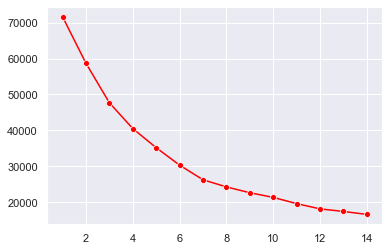

In [20]:
resultado = []

tamanho = range(1,15)

for i in tamanho:
    kkmeans = KMeans(n_clusters= i, init = 'k-means++', random_state=5, max_iter=300)
    kkmeans.fit(escalonados)
    resultado.append(kkmeans.inertia_)

sns.lineplot(tamanho, resultado, marker = 'o', color = 'red');


In [21]:
kmeans = KMeans(n_clusters=6, init ='k-means++', random_state=5, max_iter=300)
k_mean = kmeans.fit(escalonados)

 ### **2.2.Resultados dos Agrupamentos**

Agora crio um novo Data Frame para armazenar todos os dados e junta-los com os grupos que acabei de encontrar com KNN

Tambem aproveito para criar duas novas  Features, o Dia e a Hora para que eu possa furamente refinar os filtros caso sinta que existe a necessidade.

In [22]:
df4= df3.copy()
df4.dropna(inplace= True) # Limpando Dados Nulos
df4['Grupo'] = k_mean.labels_ # Criando colunas para os grupos
df4['Data'] = df['Data'].values # Pegando Datas do DF Original
df4['Dia'] = df['Data'].dt.day # Criando e populando coluna Day 
df4['Hora'] = df['Data'].dt.hour # Criando e populando coluna Hora
# Verificando a quantidade de itens de cada Grupo
df4['Grupo'].value_counts()

4    413
2    163
5    143
1    125
0    100
3     65
Name: Grupo, dtype: int64

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

---

## **3.APLICANDO REGRESSÃO LINEAR**

In [24]:
# Função para realizar os calculos
def regressao(data):
    cor  = data.corr()['Impregnadora Aq Zona 3 Temperatura Real']
    cor = abs(cor)
    temp = pd.DataFrame({'Variavel': cor.index, 'Valor':cor.values})
    mais  = temp.query('Valor >= .10')
    data = data[mais['Variavel'].values]

    # Separando Dados entre Preditores e Alvo
    y = data['Impregnadora Aq Zona 3 Temperatura Real']
    x1 = data.drop(['Impregnadora Aq Zona 3 Temperatura Real'], axis = 1)

    # Escalonando os Dados para passar ao modelo
    escala = StandardScaler()
    x = escala.fit_transform(x1)

    # Separando dados em teste e treino
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 43)

    # Fitando o modelo
    rf = RandomForestRegressor()
    rf.fit(x_train, y_train)
    

    # Fazendo predições em dados de Teste e Treino
    predicaoTeste = rf.predict(x_test)
    predicaoTreino = rf.predict(x_train)

    # Imprimindo resultados de Teste
    r2 = r2_score(y_test, predicaoTeste)
    mae = mean_absolute_error(y_test,predicaoTeste)
    RMSE_train = np.sqrt(mae)
    print('Dados de Treino')
    print(f'R²: {round(r2,2)}%')
    print(f'Mae: {round(mae,2)}')
    print(f'RMSE: {round(RMSE_train,2)}')
    print(f'MAE / Y: {round(mae / y.mean() * 100,2)}%')

    # Imprimindo resultados de Treino
    r2 = r2_score(y_train, predicaoTreino)
    mae = mean_absolute_error(y_train, predicaoTreino)
    RMSE_train = np.sqrt(mae)
    print()
    print(f'Dados de Teste')
    print(f'R²: {round(r2,2)}%')
    print(f'Mae: {round(mae,2)}')
    print(f'RMSE: {round(RMSE_train,2)}')
    print(f'MAE / Y: {round(mae / y.mean() * 100,2)}%')

    # Criando DataFrame para aramazenar dados das Principais Variáveis
    importantes = pd.DataFrame({'Variaveis': x1.columns, 'Importancia': rf.feature_importances_})
    display(importantes.sort_values(by= 'Importancia', ascending = False).head(20))
    return importantes



### **3.1.GRUPO 0**

In [25]:
g0 = regressao(df4.query('Grupo == 0'))

Dados de Treino
R²: 0.99%
Mae: 2.74
RMSE: 1.65
MAE / Y: 1.96%

Dados de Teste
R²: 0.99%
Mae: 1.19
RMSE: 1.09
MAE / Y: 0.85%


,Variaveis,Importancia
54,Impregnadora Aq Zona 4 Temperatura Real,0.153432
6,MDP Aq 02 Temp Retorno,0.126932
42,Impregnadora Vent zona 4 Status,0.056055
56,Impregnadora Aq Zona 5 Temperatura Real,0.050961
39,Impregnadora Vent zona 3 Set Point Velocidade ...,0.048913
47,Impregnadora Aq Zona 1 Temperatura Real,0.048885
35,Impregnadora Vent zona 1 Status,0.047977
50,Impregnadora Aq Zona 2 Temperatura Real,0.040014
44,Impregnadora Vent zona 5 Set Point Velocidade ...,0.039944
36,Impregnadora Vent zona 2 Set Point Velocidade,0.038359


### **3.2.GRUPO 1**

In [26]:
g1 = regressao(df4.query('Grupo == 1'))

Dados de Treino
R²: 0.17%
Mae: 3.62
RMSE: 1.9
MAE / Y: 2.21%

Dados de Teste
R²: 0.93%
Mae: 0.41
RMSE: 0.64
MAE / Y: 0.25%


,Variaveis,Importancia
41,Impregnadora Aq Zona 4 Set Point Temperatura,0.201062
45,Impregnadora Aq Zona 5 Temperatura Real,0.142513
44,Impregnadora Aq Zona 5 Set Point Temperatura,0.126931
40,Impregnadora Aq Zona 3 Set Point Temperatura,0.049069
17,MDP Aq 05 Temp Entrada,0.048314
42,Impregnadora Aq Zona 4 Temperatura Real,0.044962
30,Impregnadora Vent zona 3 Set Point Velocidade,0.041119
18,MDP Aq 05 Temp Retorno,0.041078
27,Impregnadora Temperatura de Saida Oleo,0.038591
16,MDP Aq 04 Temp Prato,0.034571


### **3.3.GRUPO 2**

In [27]:
g2 = regressao(df4.query('Grupo == 2'))

Dados de Treino
R²: 0.83%
Mae: 1.69
RMSE: 1.3
MAE / Y: 1.08%

Dados de Teste
R²: 0.96%
Mae: 0.93
RMSE: 0.97
MAE / Y: 0.6%


,Variaveis,Importancia
47,Impregnadora Aq Zona 3 Posicao Valvula,0.227373
49,Impregnadora Aq Zona 4 Temperatura Real,0.122281
32,Impregnadora Vent zona 2 Status,0.081679
50,Impregnadora Aq Zona 5 Temperatura Real,0.080218
45,Impregnadora Aq Zona 2 Temperatura Real,0.069574
43,Impregnadora Aq Zona 1 Temperatura Real,0.067401
27,Impregnadora Temperatura de Saida Oleo,0.059261
41,Impregnadora Vent zona 5 Status,0.058733
30,Impregnadora Vent zona 2 Set Point Velocidade,0.024128
29,Impregnadora Vent zona 1 Status,0.022915


### **3.4.GRUPO 3**

In [28]:
g3 = regressao(df4.query('Grupo == 3'))

Dados de Treino
R²: -91.37%
Mae: 6.7
RMSE: 2.59
MAE / Y: -17.95%

Dados de Teste
R²: 0.95%
Mae: 48.51
RMSE: 6.97
MAE / Y: -129.94%


,Variaveis,Importancia
20,Impregnadora Aq Zona 1 Temperatura Real,0.156880
15,Impregnadora Temperatura de Saida Oleo,0.141251
13,Impregnadora Vazao Oleo Termico,0.140272
23,Impregnadora Aq Zona 2 Temperatura Real,0.129692
14,Impregnadora Temperatura Entrada Oleo,0.120150
30,Impregnadora Aq Zona 5 Temperatura Real,0.044065
27,Impregnadora Aq Zona 4 Temperatura Real,0.042988
16,Impregnadora Vent zona 3 Set Point Velocidade,0.040002
32,Dia,0.031419
19,Impregnadora Aq Zona 1 Set Point Temperatura,0.030001


### **3.5.GRUPO 4**

In [29]:
g4 = regressao(df4.query('Grupo == 4'))

Dados de Treino
R²: 0.42%
Mae: 2.93
RMSE: 1.71
MAE / Y: 1.83%

Dados de Teste
R²: 0.92%
Mae: 1.2
RMSE: 1.09
MAE / Y: 0.75%


,Variaveis,Importancia
14,Planta Bomba Secudaria 2 Corrente,0.210681
32,Impregnadora Aq Zona 3 Posicao Valvula,0.110193
17,Impregnadora Vazao Oleo Termico,0.094161
12,Planta Bomba Secudaria 1 Rotacao,0.087636
11,Planta Bomba Secudaria 1 Corrente,0.051332
33,Impregnadora Aq Zona 4 Temperatura Real,0.042893
31,Impregnadora Aq Zona 3 Set Point Temperatura,0.038730
10,MDP Aq 04 Temp Prato,0.032997
15,Planta Bomba Secudaria 2 Rotacao,0.032851
34,Impregnadora Aq Zona 5 Temperatura Real,0.030298


### **3.6.GRUPO 5**

In [30]:
g5 = regressao(df4.query('Grupo == 5'))

Dados de Treino
R²: -1.86%
Mae: 19.61
RMSE: 4.43
MAE / Y: 125.41%

Dados de Teste
R²: 0.88%
Mae: 43.16
RMSE: 6.57
MAE / Y: 276.03%


,Variaveis,Importancia
19,Impregnadora Aq Zona 5 Temperatura Real,0.307274
2,MDP Aq 03 Temp Entrada,0.271517
5,Impregnadora Temperatura de Saida Oleo,0.084717
4,Impregnadora Temperatura Entrada Oleo,0.081023
16,Impregnadora Aq Zona 4 Temperatura Real,0.076852
3,Impregnadora Vazao Oleo Termico,0.074756
13,Impregnadora Aq Zona 2 Temperatura Real,0.049125
11,Impregnadora Aq Zona 1 Temperatura Real,0.030537
1,MDP Aq 03 Posi Val,0.013877
15,Impregnadora Aq Zona 4 Set Point Temperatura,0.003500


### **3.7.SOBRE OS RESULTADOS**

As principais métricas empregadas para a seleção do grupo são o R² e o MAE / Y, onde a primeira basicamente informa o quanto as variáveis preditoras explicam a variável Alvo, neste caso a temperatura de aquecimento da zona 3 e a segunda métrica cria um índice que onde tentamos encontrar o percentual de erros Médios frente aos valores reais, a ideia aqui é sempre encontrar um número menor do 10% .

Outro ponto, é que devido a pequena quantidade de variáveis empregadas no modelo, tivemos claramente situações de overfiting em vários grupos analisados.

Isso não chega a ser um problema porque o foco é justamente identificar quais variáveis podem contribuir de forma mais incisiva na temperatura da zona.

O grupo2 foi o escolhido por conta de apresentar o R² mais elevado dentre todos e também a menor relação MAE / Y


---

## **4.VERIFICANDO VARIÁVEIS DO PROCESSO**

Critério para a seleção foi um ponto de corte no “Grau de importância”. Aqui, estabelecemos um valor mínimo de 0,005.

Este valor foi interessante, porque acabou contemplando grande parte das variáveis envolvidas no processo de impregnação de papel. 


In [48]:
dados = g2.query('Importancia >= 0.005').sort_values(by = 'Importancia', ascending= False )
dados

,Variaveis,Importancia
47,Impregnadora Aq Zona 3 Posicao Valvula,0.227373
49,Impregnadora Aq Zona 4 Temperatura Real,0.122281
32,Impregnadora Vent zona 2 Status,0.081679
50,Impregnadora Aq Zona 5 Temperatura Real,0.080218
45,Impregnadora Aq Zona 2 Temperatura Real,0.069574
43,Impregnadora Aq Zona 1 Temperatura Real,0.067401
27,Impregnadora Temperatura de Saida Oleo,0.059261
41,Impregnadora Vent zona 5 Status,0.058733
30,Impregnadora Vent zona 2 Set Point Velocidade,0.024128
29,Impregnadora Vent zona 1 Status,0.022915


In [49]:
# Criando as colunas Dia e Filtro para realizar pesquisas
final = df4[dados['Variaveis'].values.tolist()]
final['Nariz'] = df['Prensa'].values
final['Dia'] = df4['Dia'].values

In [50]:
variavel = []
mediaNarizFechado = []
mediaNarizAberto = [] 
mediaProblema = []

for i in final.columns.tolist():
    if i != 'Nariz':
        variavel.append(i)
        
        fechado = final.query('Nariz == "Fechado"')
        mediaNarizFechado.append(fechado[i].mean())
        
        aberto = final.query('Nariz == "Aberto"')
        mediaNarizAberto.append(aberto[i].mean())

        problema = final.query("Dia >= 19 and  Dia <= 20")
        mediaProblema.append(problema[i].mean())
    else:
        pass

resumo = pd.DataFrame({
    'Variavel': variavel,
    'Media Nariz Fechado': mediaNarizFechado,
    'Media Nariz Aberto': mediaNarizAberto,
    'Media Problema':mediaProblema
})

In [51]:
round(resumo.loc[resumo['Variavel'] != 'Dia'].sort_values(by ='Media Problema', ascending  = False ),2)

,Variavel,Media Nariz Fechado,Media Nariz Aberto,Media Problema
25,Impregnadora Vent zona 3 Set Point Velocidade,1704.23,1706.50,1705.71
19,Impregnadora Vent zona 3 Set Point Velocidade ...,1360.77,1248.29,1584.43
15,Impregnadora Vent zona 1 Set Point Velocidade ...,1360.77,1248.29,1584.43
10,Impregnadora Vent zona 4 Set Point Velocidade ...,1362.29,1247.19,1572.71
13,Impregnadora Vent zona 5 Set Point Velocidade ...,1361.58,1248.65,1570.63
12,Impregnadora Vent zona 2 Set Point Velocidade ...,1360.81,1244.89,1566.83
8,Impregnadora Vent zona 2 Set Point Velocidade,1360.81,1244.89,1566.83
6,Impregnadora Temperatura de Saida Oleo,251.40,247.25,256.66
11,MDP Aq 04 Temp Entrada,199.29,156.89,181.48
18,MDP Aq 04 Temp Retorno,198.13,158.29,181.01
